In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lendo import 2018-2019

In [121]:
crops = pd.read_csv('Safra_2018-2019.csv',index_col=1)

Retirando info irrelevante

In [122]:
crops = crops.drop(['Temporada','Unnamed: 0'],axis=1)

Avaliando/Entendendo dados da Planilha

In [123]:
crops.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,dano_na_plantacao
Identificador_Agricultor,,,,,,,,
SCROP00001,188,1,0,1,0,0.0,0,0
SCROP00002,209,1,0,1,0,0.0,0,1
SCROP00003,257,1,0,1,0,0.0,0,1
SCROP00004,257,1,1,1,0,0.0,0,1
SCROP00005,342,1,0,1,0,0.0,0,1


In [124]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, SCROP00001 to SCROP80000
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estimativa_de_Insetos  80000 non-null  int64  
 1   Tipo_de_Cultivo        80000 non-null  int64  
 2   Tipo_de_Solo           80000 non-null  int64  
 3   Categoria_Pesticida    80000 non-null  int64  
 4   Doses_Semana           80000 non-null  int64  
 5   Semanas_Utilizando     71945 non-null  float64
 6   Semanas_Sem_Uso        80000 non-null  int64  
 7   dano_na_plantacao      80000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.5+ MB


In [125]:
crops.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000
mean,1400.020875,0.283338,0.455550,2.267587,25.846750,28.664480,9.549088,0.192312
std,849.792471,0.450622,0.498023,0.463748,15.557246,12.424751,9.905547,0.455912
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,2.000000


Explorando visualmente os dados

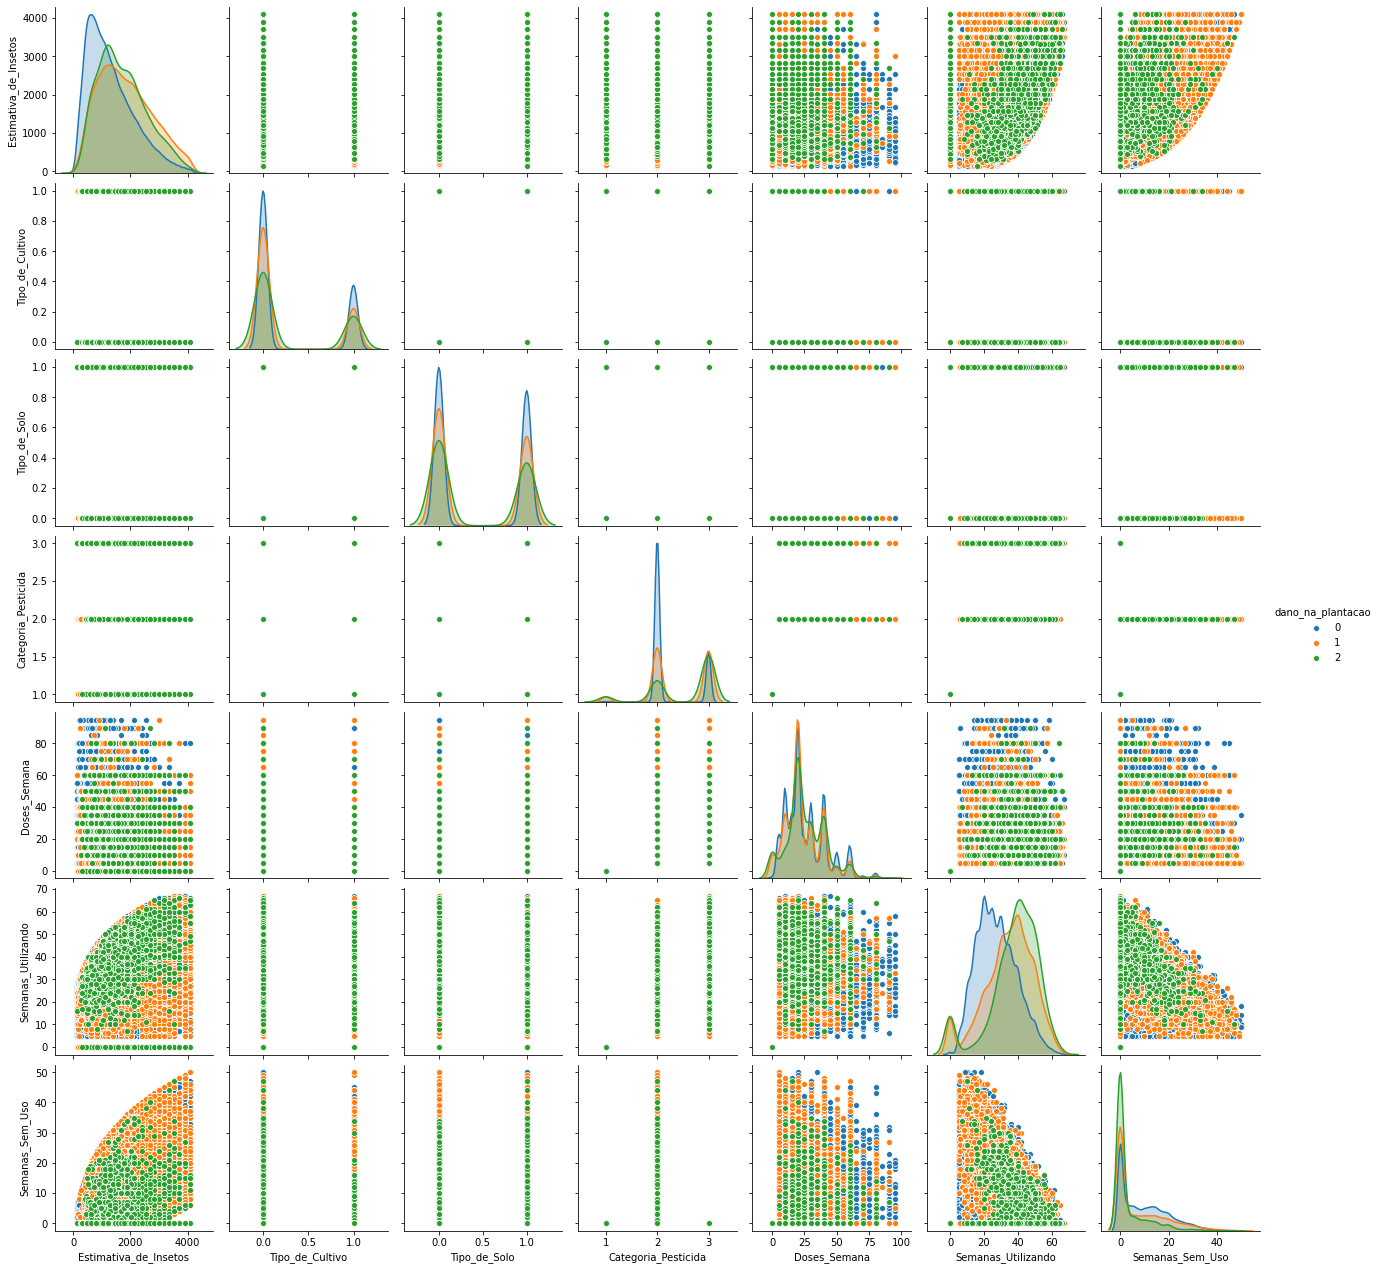

In [126]:
sns.pairplot(crops,hue='dano_na_plantacao')

<AxesSubplot:xlabel='dano_na_plantacao', ylabel='count'>

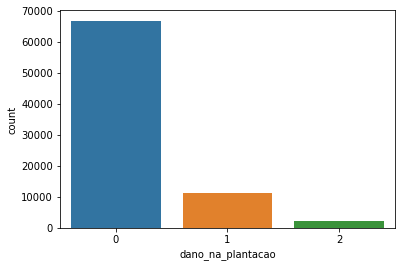

In [127]:
sns.countplot(x = 'dano_na_plantacao',data = crops)

<AxesSubplot:xlabel='Tipo_de_Solo', ylabel='count'>

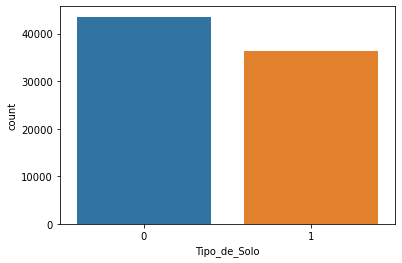

In [128]:
sns.countplot(x = 'Tipo_de_Solo',data = crops)

<AxesSubplot:xlabel='Tipo_de_Cultivo', ylabel='count'>

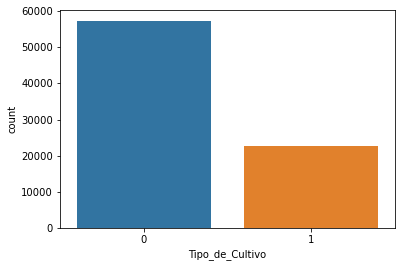

In [129]:
sns.countplot(x = 'Tipo_de_Cultivo',data = crops)

Análisando correlações

In [130]:
crops.corr()['dano_na_plantacao'].sort_values()

Semanas_Sem_Uso         -0.133115
Doses_Semana            -0.030476
Tipo_de_Solo            -0.021176
Tipo_de_Cultivo         -0.017228
Categoria_Pesticida      0.172943
Estimativa_de_Insetos    0.203290
Semanas_Utilizando       0.233523
dano_na_plantacao        1.000000
Name: dano_na_plantacao, dtype: float64

Lidando com dados categóricos (one hot encoding)

In [131]:
#drop first = True para não termos informações repetitivas
pest = pd.get_dummies(crops['Categoria_Pesticida'],drop_first=True)

crops = pd.concat([crops,pest],axis=1)

crops = crops.drop('Categoria_Pesticida',axis=1)


Checando valores nulos

In [132]:
crops.isnull().sum()

Estimativa_de_Insetos       0
Tipo_de_Cultivo             0
Tipo_de_Solo                0
Doses_Semana                0
Semanas_Utilizando       8055
Semanas_Sem_Uso             0
dano_na_plantacao           0
2                           0
3                           0
dtype: int64

Qual porcentagem dos dados é nulo?

In [133]:
#porcentagem de dados nulos
100 * crops.isnull().sum()/len(crops)

Estimativa_de_Insetos     0.00000
Tipo_de_Cultivo           0.00000
Tipo_de_Solo              0.00000
Doses_Semana              0.00000
Semanas_Utilizando       10.06875
Semanas_Sem_Uso           0.00000
dano_na_plantacao         0.00000
2                         0.00000
3                         0.00000
dtype: float64

Como temos muitos dados faltando em 'semanas_utizado' e essa colona tem correlacao alta  com 'Estimativa de insetos',
vou usar a coluna 'estimativa de insetos' para me ajudar a aproximar um valor para os dados que não temos.
Interessante notar que provávelmente o pesticida tipo 3 tem que ser aplicado muitas vezes pela sua alta correlação com 'semanas_utizado', já o pesticida 2 não.

In [134]:
crops.corr()['Semanas_Utilizando'].sort_values()

Semanas_Sem_Uso         -0.447572
2                       -0.256839
Tipo_de_Solo            -0.068448
Tipo_de_Cultivo         -0.045033
Doses_Semana             0.123933
dano_na_plantacao        0.233523
3                        0.307770
Estimativa_de_Insetos    0.435935
Semanas_Utilizando       1.000000
Name: Semanas_Utilizando, dtype: float64

In [135]:
insetos_est = crops.groupby('Estimativa_de_Insetos').mean()['Semanas_Utilizando']

In [136]:
def completar_Semanas_Utilizando(Estimativa_de_Insetos,Semanas_Utilizando):
    if np.isnan(Semanas_Utilizando):
        return insetos_est[Estimativa_de_Insetos]
    else:
        return Semanas_Utilizando

Aplicando a função com uma expressão lambda

In [137]:
crops['Semanas_Utilizando'] = crops.apply(lambda x: completar_Semanas_Utilizando(x['Estimativa_de_Insetos'],x['Semanas_Utilizando']),axis=1)

In [138]:
#sem valores nulos
crops.isnull().sum()

Estimativa_de_Insetos    0
Tipo_de_Cultivo          0
Tipo_de_Solo             0
Doses_Semana             0
Semanas_Utilizando       0
Semanas_Sem_Uso          0
dano_na_plantacao        0
2                        0
3                        0
dtype: int64

One hot encoding de 'danos na plantacao'

In [139]:
respostas = pd.get_dummies(crops['dano_na_plantacao'])

respostas.columns = ["Sem_Danos","Danos_Outros_Motivos","Danos_Pesticidas"]

crops = pd.concat([crops,respostas],axis=1)

crops = crops.drop('dano_na_plantacao',axis=1)

Trainando o modelo de ML

In [140]:
X = crops.drop(["Sem_Danos","Danos_Outros_Motivos","Danos_Pesticidas"],axis=1).values
y = crops[["Sem_Danos","Danos_Outros_Motivos","Danos_Pesticidas"]].values


In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X_train.shape

(64000, 8)

In [155]:
def base_model():
    model = Sequential()

    model.add(Dense(8,input_dim=8, activation = 'relu'))
    model.add(Dense(4,activation = 'relu'))
    model.add(Dense(units = 3,activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [156]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [157]:
estimador = KerasClassifier(build_fn=base_model, epochs=90, batch_size=80, verbose=0)

In [158]:
kfold = KFold(n_splits=10, shuffle=True)

In [159]:
resultados = cross_val_score(estimador, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (resultados.mean()*100, resultados.std()*100))


Baseline: 83.28% (0.42%)


In [160]:
estimador.fit(X,y)

Realizando Previsão para 2020

In [161]:
cropsnew = pd.read_csv('Safra_2020.csv',index_col=1)

cropsnew = cropsnew.drop(['Temporada','Unnamed: 0'],axis=1)

pestnew = pd.get_dummies(cropsnew['Categoria_Pesticida'],drop_first=True)

cropsnew = pd.concat([cropsnew,pestnew],axis=1)

cropsnew = cropsnew.drop('Categoria_Pesticida',axis=1)

insetos_est_new = cropsnew.groupby('Estimativa_de_Insetos').mean()['Semanas_Utilizando']

cropsnew['Semanas_Utilizando'] = cropsnew.apply(lambda x: completar_Semanas_Utilizando(x['Estimativa_de_Insetos'],x['Semanas_Utilizando']),axis=1)

In [162]:
cropsnew_pred = estimador.predict(cropsnew)

In [163]:
cropsnew_pred

array([0, 0, 0, ..., 0, 0, 0])

Na célula acima temos um array com os casos previstos para 2020, respectivamente: "Sem_Danos","Danos_Outros_Motivos","Danos_Pesticidas". todods em formato binário, ou seja, 1 se a condição for verdadeira e 0 se for falsa.

Concluindo o estudo, conseguimos uma acurácia de aproximadamente: 83-84%,com desvio pardão de 0,2-0,4%, não é o melhor resultado. No entanto, devido a discrepância na quantidade de casos "Sem_Danos" em relação ao resto torna a situação um pouco difícil. Caso consiguissemos balanciar um pouco mais os dados de entrada para o treino do modelo, provavelmente consiguiriamos resultados melhores.

Obrigado pela oportunidade!

Julio Alvarez.